In [1]:
# Week 3: Data Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better looking plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ Week 3 Visualization Environment Ready!")

# Load your CLEANED dataset from Week 2
# If you saved the cleaned version:
df = pd.read_csv('titanic_cleaned.csv')

# Or if you need to clean again quickly:
# url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
# df = pd.read_csv(url)
# # Quick cleaning (repeat from Week 2)
# df = df.drop('Cabin', axis=1)
# df['Age'].fillna(df['Age'].median(), inplace=True)
# df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print("\nColumns available:", df.columns.tolist())

✅ Week 3 Visualization Environment Ready!
Dataset loaded successfully!
Dataset shape: (891, 11)

Columns available: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked']


In [2]:
print("=== DATASET OVERVIEW FOR VISUALIZATION ===")
print(df.info())
print("\nFirst 5 rows:")
display(df.head())

=== DATASET OVERVIEW FOR VISUALIZATION ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB
None

First 5 rows:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


=== BAR CHART ===


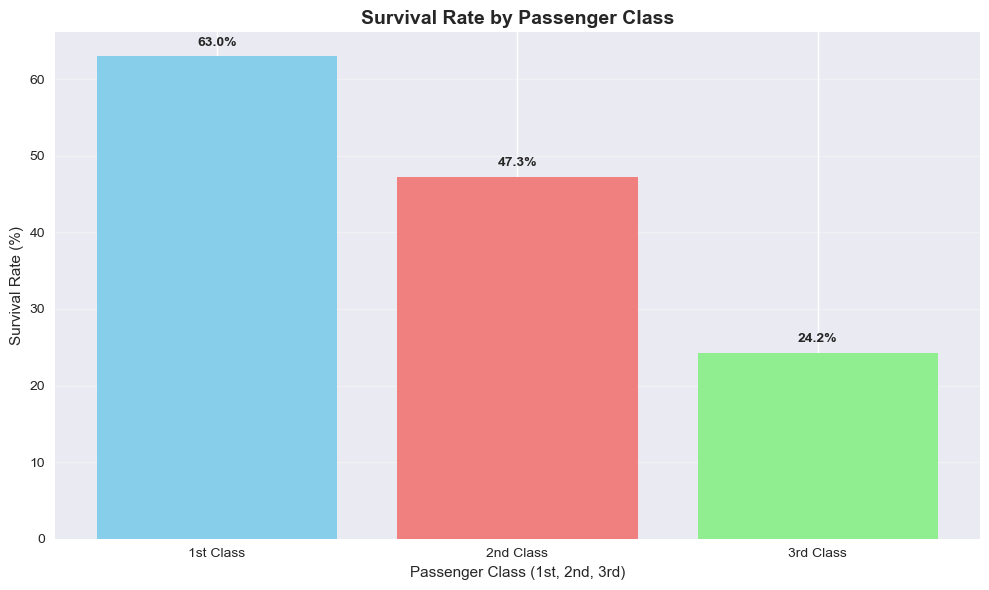

📊 Bar Chart Created: Survival Rate by Passenger Class


In [3]:
print("=== BAR CHART ===")
plt.figure(figsize=(10, 6))

# Example: Survival count by passenger class
survival_by_class = df.groupby('Pclass')['Survived'].mean() * 100

plt.bar(survival_by_class.index, survival_by_class.values, 
        color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Survival Rate by Passenger Class', fontsize=14, fontweight='bold')
plt.xlabel('Passenger Class (1st, 2nd, 3rd)')
plt.ylabel('Survival Rate (%)')
plt.xticks([1, 2, 3], ['1st Class', '2nd Class', '3rd Class'])
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(survival_by_class.values):
    plt.text(i + 1, v + 1, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("📊 Bar Chart Created: Survival Rate by Passenger Class")

=== SCATTER PLOT ===


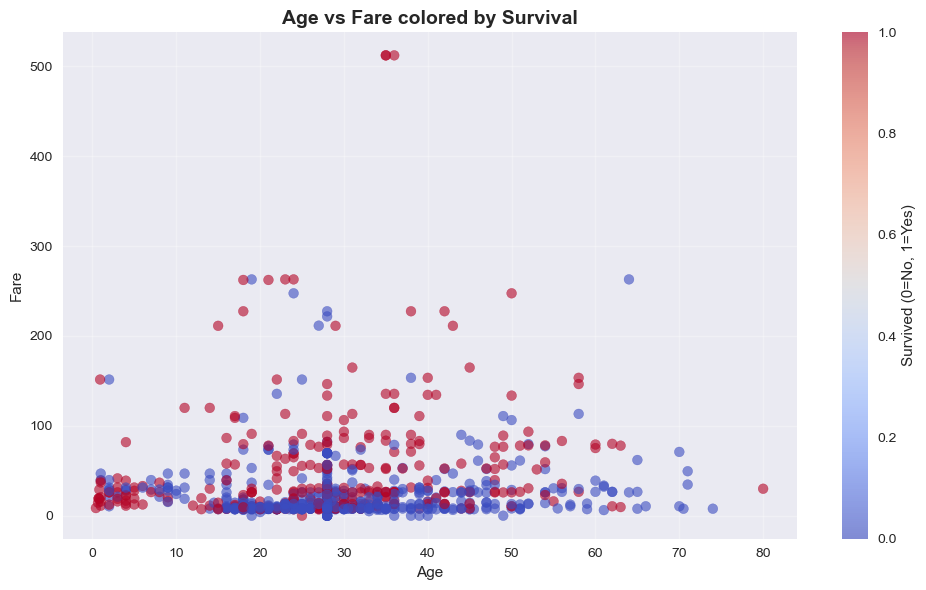

📊 Scatter Plot Created: Age vs Fare (colored by survival)


In [4]:
print("=== SCATTER PLOT ===")
plt.figure(figsize=(10, 6))

# Create scatter plot with coloring based on survival
scatter = plt.scatter(df['Age'], df['Fare'], 
                     c=df['Survived'], 
                     alpha=0.6, 
                     cmap='coolwarm',
                     s=50)  # s controls point size

plt.colorbar(scatter, label='Survived (0=No, 1=Yes)')
plt.title('Age vs Fare colored by Survival', fontsize=14, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("📊 Scatter Plot Created: Age vs Fare (colored by survival)")

=== HISTOGRAM ===


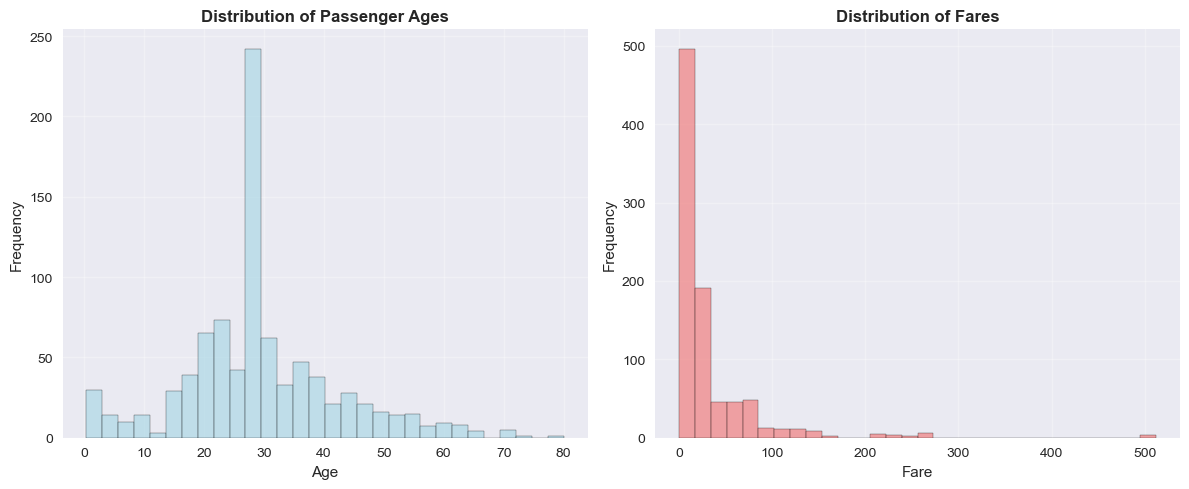

📊 Histograms Created: Age and Fare distributions


In [5]:
print("=== HISTOGRAM ===")
plt.figure(figsize=(12, 5))

# Plot 1: Age distribution
plt.subplot(1, 2, 1)
plt.hist(df['Age'], bins=30, color='lightblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Passenger Ages', fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)

# Plot 2: Fare distribution
plt.subplot(1, 2, 2)
plt.hist(df['Fare'], bins=30, color='lightcoral', edgecolor='black', alpha=0.7)
plt.title('Distribution of Fares', fontweight='bold')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("📊 Histograms Created: Age and Fare distributions")

=== PLOT 1: SURVIVAL BY GENDER ===


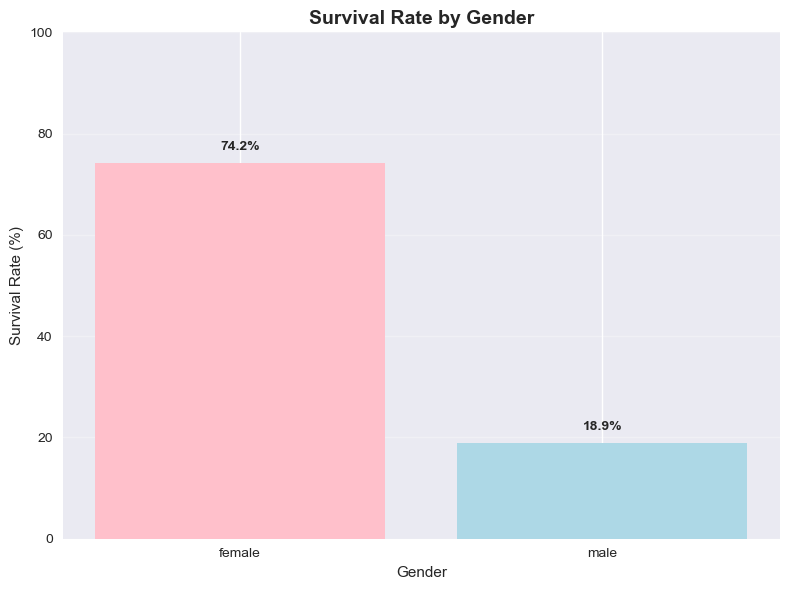


📝 INSIGHT 1: Survival by Gender
- Females had a significantly higher survival rate than males
- This reflects the "women and children first" protocol during the evacuation
- Gender was a major factor in survival chances



In [6]:
print("=== PLOT 1: SURVIVAL BY GENDER ===")
plt.figure(figsize=(8, 6))

# Calculate survival rates by gender
gender_survival = df.groupby('Sex')['Survived'].mean() * 100

bars = plt.bar(gender_survival.index, gender_survival.values, 
               color=['pink', 'lightblue'])

plt.title('Survival Rate by Gender', fontsize=14, fontweight='bold')
plt.xlabel('Gender')
plt.ylabel('Survival Rate (%)')
plt.ylim(0, 100)

# Add value labels
for bar, value in zip(bars, gender_survival.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, 
             f'{value:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("""
📝 INSIGHT 1: Survival by Gender
- Females had a significantly higher survival rate than males
- This reflects the "women and children first" protocol during the evacuation
- Gender was a major factor in survival chances
""")

=== PLOT 2: AGE DISTRIBUTION BY SURVIVAL ===


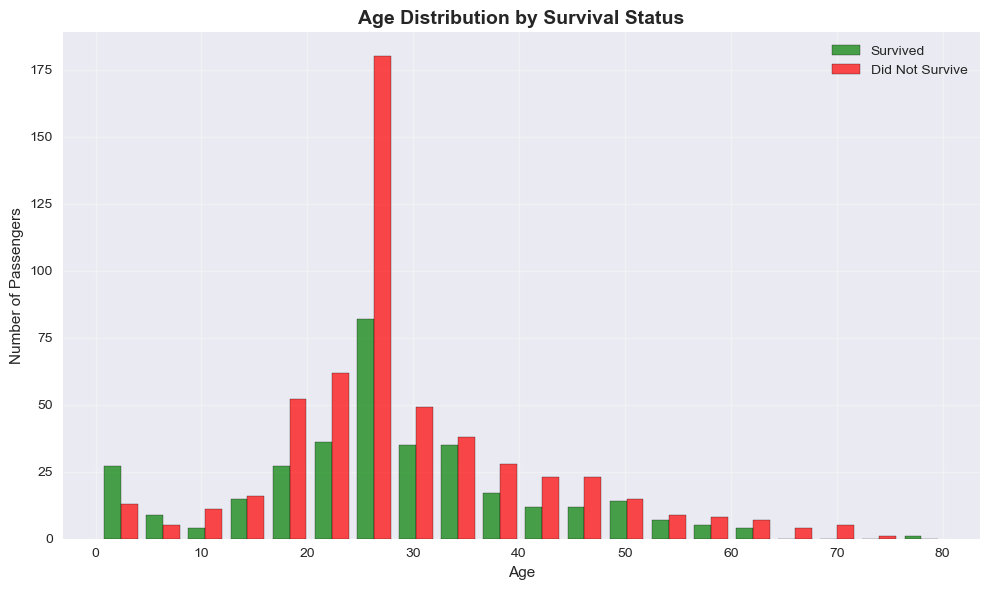


📝 INSIGHT 2: Age Distribution by Survival
- Younger passengers (children) had higher survival rates
- The distribution shows concentration of survivors in lower age ranges
- Elderly passengers were less likely to survive



In [7]:
print("=== PLOT 2: AGE DISTRIBUTION BY SURVIVAL ===")
plt.figure(figsize=(10, 6))

# Create histogram for survivors vs non-survivors
plt.hist([df[df['Survived'] == 1]['Age'], df[df['Survived'] == 0]['Age']], 
         bins=20, label=['Survived', 'Did Not Survive'], 
         color=['green', 'red'], alpha=0.7, edgecolor='black')

plt.title('Age Distribution by Survival Status', fontsize=14, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("""
📝 INSIGHT 2: Age Distribution by Survival
- Younger passengers (children) had higher survival rates
- The distribution shows concentration of survivors in lower age ranges
- Elderly passengers were less likely to survive
""")

=== PLOT 3: FARE VS AGE BY PASSENGER CLASS ===


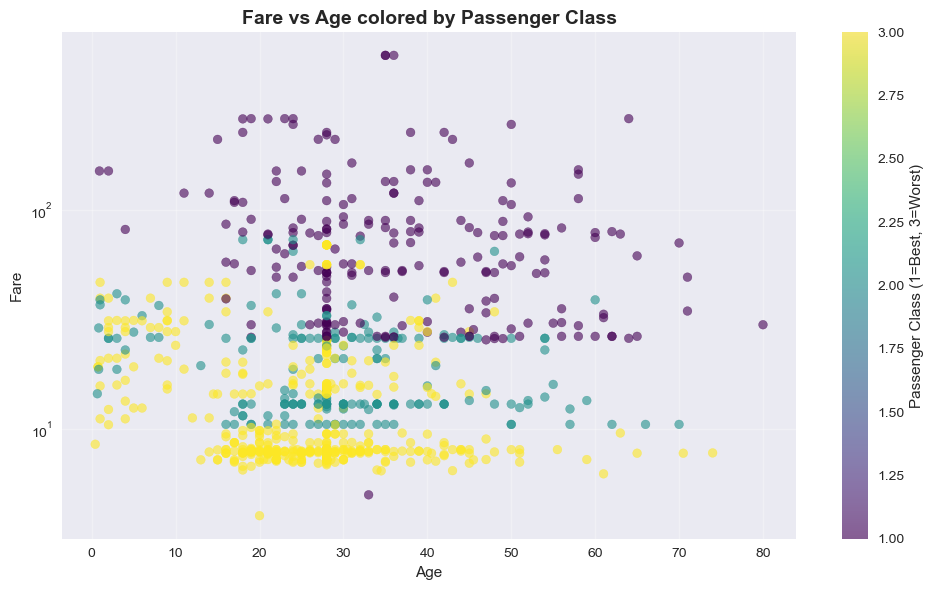


📝 INSIGHT 3: Fare vs Age by Class
- 1st class passengers paid significantly higher fares across all ages
- There's a clear stratification by class in terms of fare paid
- Younger 1st class passengers paid similar fares to older 1st class passengers
- Class privilege is clearly visible in the pricing structure



In [8]:
print("=== PLOT 3: FARE VS AGE BY PASSENGER CLASS ===")
plt.figure(figsize=(10, 6))

# Create scatter plot colored by passenger class
scatter = plt.scatter(df['Age'], df['Fare'], 
                     c=df['Pclass'], 
                     cmap='viridis', 
                     alpha=0.6, 
                     s=40)

plt.colorbar(scatter, label='Passenger Class (1=Best, 3=Worst)')
plt.title('Fare vs Age colored by Passenger Class', fontsize=14, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.yscale('log')  # Use log scale for better visualization
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("""
📝 INSIGHT 3: Fare vs Age by Class
- 1st class passengers paid significantly higher fares across all ages
- There's a clear stratification by class in terms of fare paid
- Younger 1st class passengers paid similar fares to older 1st class passengers
- Class privilege is clearly visible in the pricing structure
""")

=== PLOT 4: SURVIVAL BY EMBARKATION PORT ===


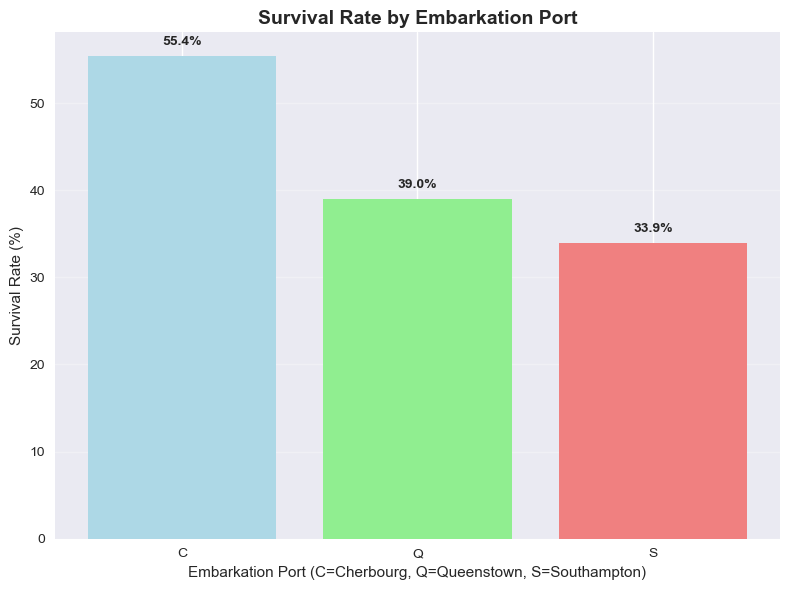


📝 INSIGHT 4: Survival by Embarkation Port
- Passengers from Cherbourg (C) had the highest survival rate
- Southampton (S) passengers had the lowest survival rate
- This could be related to the passenger class distribution at each port
- Location of embarkation may have influenced access to lifeboats



In [9]:
print("=== PLOT 4: SURVIVAL BY EMBARKATION PORT ===")
plt.figure(figsize=(8, 6))

# Calculate survival rates by embarkation port
embark_survival = df.groupby('Embarked')['Survived'].mean() * 100

bars = plt.bar(embark_survival.index, embark_survival.values, 
               color=['lightblue', 'lightgreen', 'lightcoral'])

plt.title('Survival Rate by Embarkation Port', fontsize=14, fontweight='bold')
plt.xlabel('Embarkation Port (C=Cherbourg, Q=Queenstown, S=Southampton)')
plt.ylabel('Survival Rate (%)')

# Add value labels
for bar, value in zip(bars, embark_survival.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
             f'{value:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("""
📝 INSIGHT 4: Survival by Embarkation Port
- Passengers from Cherbourg (C) had the highest survival rate
- Southampton (S) passengers had the lowest survival rate
- This could be related to the passenger class distribution at each port
- Location of embarkation may have influenced access to lifeboats
""")

=== PLOT 5: FAMILY SIZE VS SURVIVAL ===


C:\Users\khadi\AppData\Local\Temp\ipykernel_9352\3608721014.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='FamilySize', data=df, palette=['red', 'green'])


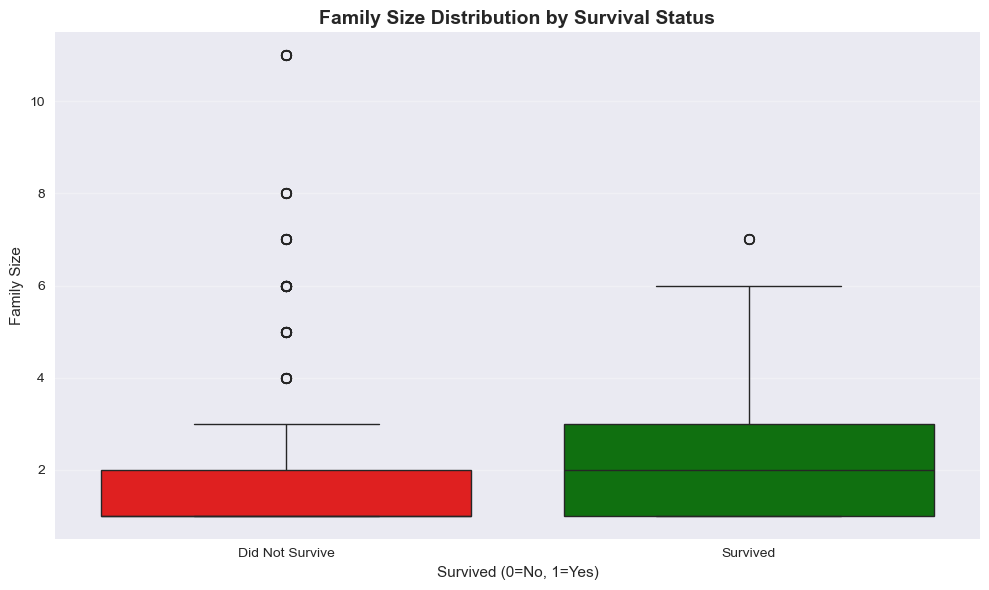


📝 INSIGHT 5: Family Size vs Survival
- Survivors tended to have smaller family sizes on average
- Single passengers or those with very small families had better survival chances
- Larger families might have faced challenges staying together during evacuation
- The median family size for survivors is lower than for non-survivors



In [10]:
print("=== PLOT 5: FAMILY SIZE VS SURVIVAL ===")
plt.figure(figsize=(10, 6))

# Create family size feature (SibSp + Parch)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # +1 for the passenger themselves

# Create box plot
sns.boxplot(x='Survived', y='FamilySize', data=df, palette=['red', 'green'])
plt.title('Family Size Distribution by Survival Status', fontsize=14, fontweight='bold')
plt.xlabel('Survived (0=No, 1=Yes)')
plt.ylabel('Family Size')
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("""
📝 INSIGHT 5: Family Size vs Survival
- Survivors tended to have smaller family sizes on average
- Single passengers or those with very small families had better survival chances
- Larger families might have faced challenges staying together during evacuation
- The median family size for survivors is lower than for non-survivors
""")

=== BONUS: CORRELATION HEATMAP ===


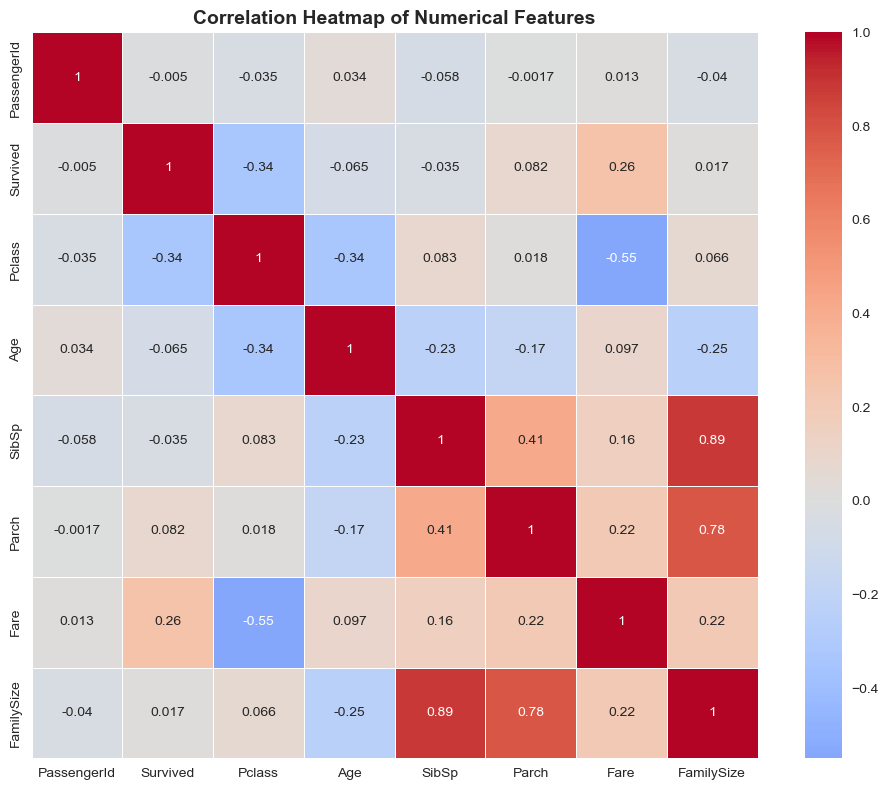


🔥 BONUS INSIGHT: Correlation Heatmap
- Fare and Pclass have strong negative correlation (higher class = higher fare)
- FamilySize has slight positive correlation with number of siblings/spouses
- Survival shows moderate correlation with Fare and Pclass



In [11]:
print("=== BONUS: CORRELATION HEATMAP ===")
plt.figure(figsize=(10, 8))

# Calculate correlation matrix
correlation_matrix = df.select_dtypes(include=[np.number]).corr()

# Create heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("""
🔥 BONUS INSIGHT: Correlation Heatmap
- Fare and Pclass have strong negative correlation (higher class = higher fare)
- FamilySize has slight positive correlation with number of siblings/spouses
- Survival shows moderate correlation with Fare and Pclass
""")

In [12]:
# Save your visualization work
print("💾 ASSIGNMENT 3 COMPLETE!")
print("5 different plots created with insights:")
print("1. Survival by Gender - Bar Plot")
print("2. Age Distribution by Survival - Histogram") 
print("3. Fare vs Age by Class - Scatter Plot")
print("4. Survival by Embarkation Port - Bar Plot")
print("5. Family Size vs Survival - Box Plot")
print("\n📁 Save this notebook as 'week3_data_visualization.ipynb'")
print("🚀 Upload to GitHub to complete Assignment 3!")

💾 ASSIGNMENT 3 COMPLETE!
5 different plots created with insights:
1. Survival by Gender - Bar Plot
2. Age Distribution by Survival - Histogram
3. Fare vs Age by Class - Scatter Plot
4. Survival by Embarkation Port - Bar Plot
5. Family Size vs Survival - Box Plot

📁 Save this notebook as 'week3_data_visualization.ipynb'
🚀 Upload to GitHub to complete Assignment 3!
